In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set(style="whitegrid")

# Make charts display inline
%matplotlib inline

# Optional: widen column display for better viewing
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv("/content/sample_data/Netflix Dataset.csv")

In [5]:
print("🔹 First 5 records:")
display(df.head())

🔹 First 5 records:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Check shape (rows × columns)
print(f"\n🔹 Dataset Shape: {df.shape}")


🔹 Dataset Shape: (7789, 11)


In [8]:
# Check column names
print("\n🔹 Column Names:")
print(df.columns)



🔹 Column Names:
Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [9]:
# Check data types and missing values
print("\n🔹 Info:")
print(df.info())


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [10]:
# Count missing values
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())


🔹 Missing Values per Column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [12]:
# Fill missing categorical values with placeholders
df['Director'].fillna('Not Specified', inplace=True)
df['Cast'].fillna('Not Specified', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-1121090562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Not Specified', inplace=True)
/tmp/ipython-input-1121090562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [13]:
# Convert 'Release_Date' to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [14]:
# Extract year for trend analysis
df['Year'] = df['Release_Date'].dt.year

In [15]:
# Create a primary country column (for when multiple countries are listed)
df['Primary_Country'] = df['Country'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)


In [16]:
# Verify after cleaning
print("\n✅ Cleaned Dataset Overview:")
print(df.info())


✅ Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Show_Id          7787 non-null   object        
 1   Category         7787 non-null   object        
 2   Title            7787 non-null   object        
 3   Director         7787 non-null   object        
 4   Cast             7787 non-null   object        
 5   Country          7787 non-null   object        
 6   Release_Date     7689 non-null   datetime64[ns]
 7   Rating           7787 non-null   object        
 8   Duration         7787 non-null   object        
 9   Type             7787 non-null   object        
 10  Description      7787 non-null   object        
 11  Year             7689 non-null   float64       
 12  Primary_Country  7787 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 851.7+ KB


In [17]:
print(df.isnull().sum())

Show_Id             0
Category            0
Title               0
Director            0
Cast                0
Country             0
Release_Date       98
Rating              0
Duration            0
Type                0
Description         0
Year               98
Primary_Country     0
dtype: int64


In [18]:
# Basic descriptive statistics
print("\n🔹 Descriptive Statistics:")
display(df.describe(include='all'))


🔹 Descriptive Statistics:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Primary_Country
count,7787,7787,7787,7787,7787,7787,7689,7787,7787,7787,7787,7689.000000,7787
unique,7787,2,7787,4051,6832,682,NaN,15,216,492,7769,NaN,82
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Not Specified,Not Specified,United States,NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...,NaN,United States
freq,1,5377,1,2388,718,2555,NaN,2863,1608,334,3,NaN,2883
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-07 20:44:06.273897728,NaN,NaN,NaN,NaN,2018.507218,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,2008.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,2018.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-15 00:00:00,NaN,NaN,NaN,NaN,2019.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-25 00:00:00,NaN,NaN,NaN,NaN,2020.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00,NaN,NaN,NaN,NaN,2021.000000,NaN


In [19]:
# Count of unique values in key columns
print("\n🔹 Unique values in key columns:")
print("Category:", df['Category'].nunique())
print("Country:", df['Primary_Country'].nunique())
print("Type (Genre):", df['Type'].nunique())



🔹 Unique values in key columns:
Category: 2
Country: 82
Type (Genre): 492


In [20]:
print("\n🔹 Top 10 Genres:")
display(df['Type'].value_counts().head(10))


🔹 Top 10 Genres:


,count
Type,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
Kids' TV,205
Children & Family Movies,177
"Documentaries, International Movies",172
"Children & Family Movies, Comedies",169


/tmp/ipython-input-571855504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


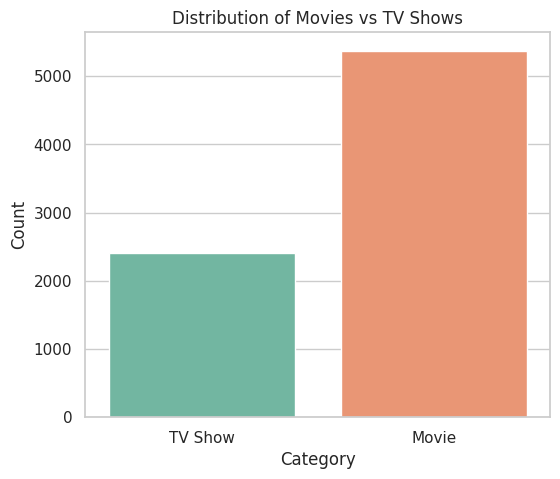

In [21]:
# Movies vs TV Shows
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

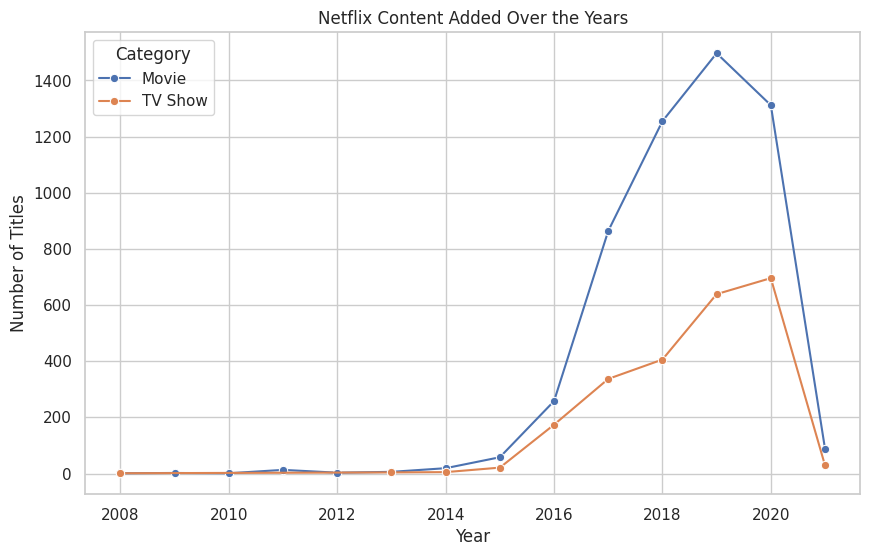

In [22]:
# Content added over the years
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(10,6))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

/tmp/ipython-input-4274112281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


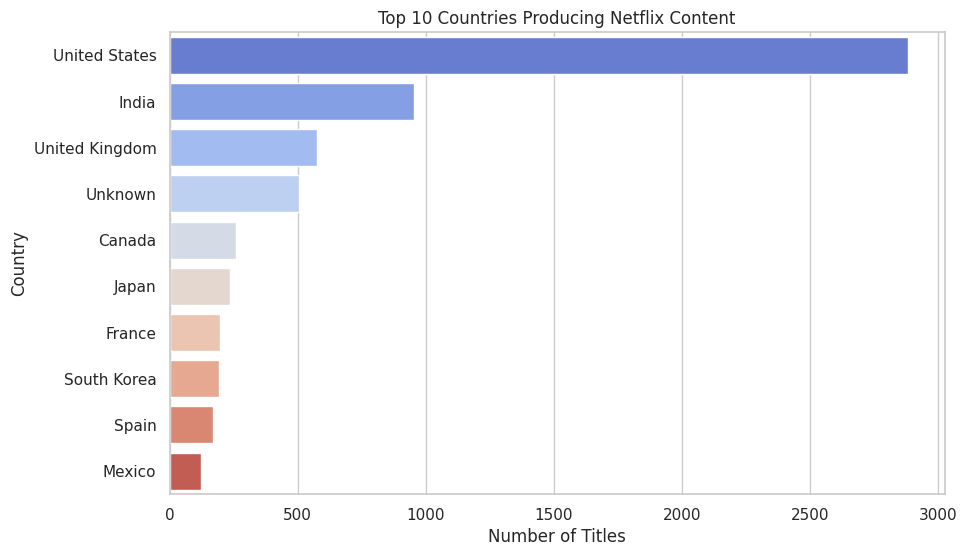

In [23]:
# Top 10 Countries by Content Count
top_countries = df['Primary_Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

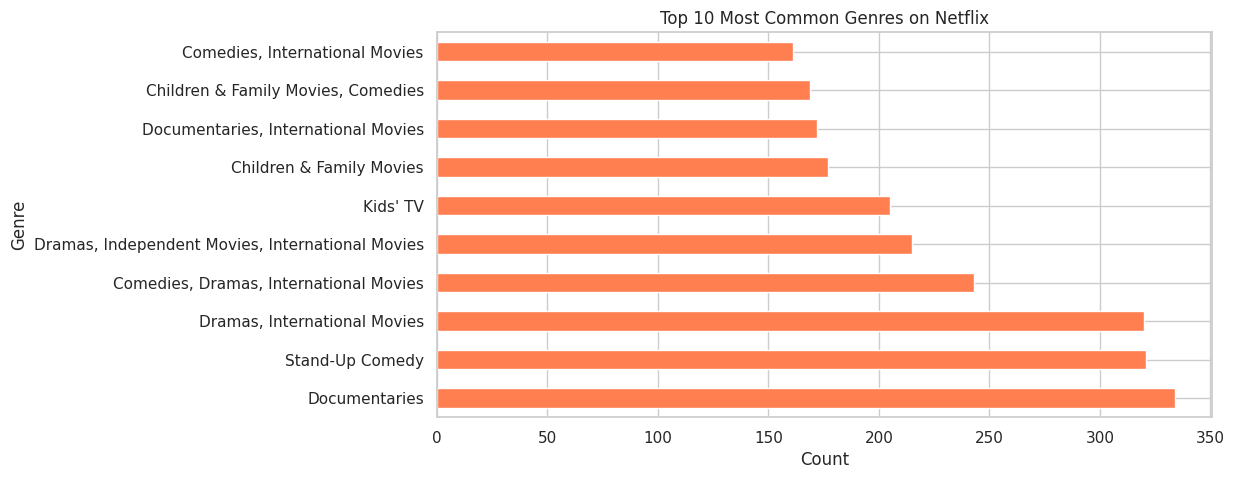

In [24]:
# Top 10 Genres
plt.figure(figsize=(10,5))
df['Type'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-3374172276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='viridis')


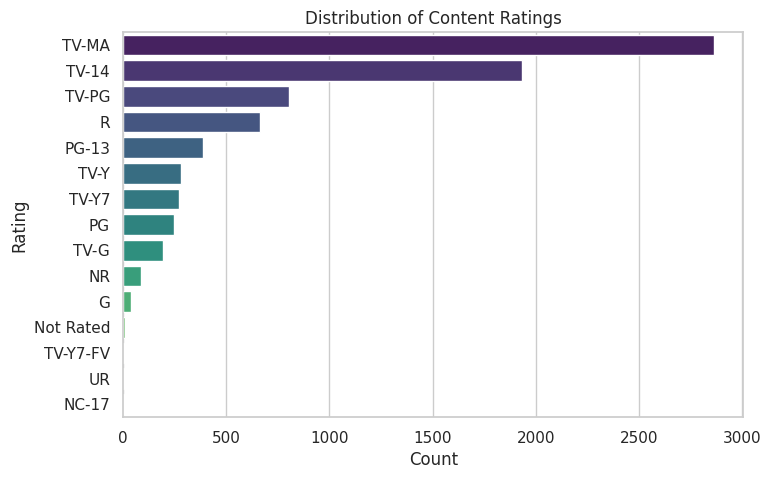

In [25]:
# Content Ratings Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

In [26]:
# Filter all Indian content
indian_content = df[df['Primary_Country'] == 'India']
print("🔹 Total Indian Titles:", indian_content.shape[0])
display(indian_content.head(3))


🔹 Total Indian Titles: 956


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Primary_Country
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019.0,India
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017.0,India
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0,India


In [27]:
# Filter all TV Shows released after 2018
recent_tv = df[(df['Category'] == 'TV Show') & (df['Year'] >= 2019)]
print("🔹 TV Shows released after 2018:", recent_tv.shape[0])

🔹 TV Shows released after 2018: 1364


In [28]:
# Movies directed by a specific director
nolan_movies = df[(df['Director'].str.contains("Nolan", case=False, na=False))]
print("🔹 Movies directed by 'Nolan':")
display(nolan_movies[['Title', 'Director', 'Year']])


🔹 Movies directed by 'Nolan':


,Title,Director,Year
2979,Inception,Christopher Nolan,2020.0


In [29]:
# Filter by genre (Type column)
drama_titles = df[df['Type'].str.contains("Drama", case=False, na=False)]
print("🔹 Total Drama Titles:", drama_titles.shape[0])

🔹 Total Drama Titles: 2810


In [30]:
print("SUMMARY INSIGHTS")
print(f"Total Movies: {df[df['Category'] == 'Movie'].shape[0]}")
print(f"Total TV Shows: {df[df['Category'] == 'TV Show'].shape[0]}")
print(f"Top Content Country: {top_countries.index[0]}")
print(f"Most Common Genre: {df['Type'].mode()[0]}")
print(f"Data Range: {int(df['Year'].min())} - {int(df['Year'].max())}")

SUMMARY INSIGHTS
Total Movies: 5377
Total TV Shows: 2410
Top Content Country: United States
Most Common Genre: Documentaries
Data Range: 2008 - 2021
